## 1. ASK
##  1.1 Key Stakeholders
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer.
2. Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team.
3. Bellabeat marketing analytics team.
4. Clients

## 1.2 Business Task
1. Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. 
2. Select one Bellabeat product to apply these insights to.
3. How do these insights help?

# 2. PERPARE 

## 2.1 Data Content
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.
https://www.kaggle.com/datasets/arashnic/fitbit


## 2.2 Data Storage and Usage
Data is downloaded onto my local machine and store in a local folder. I only used 4 datasets out of 18 because I want to focus more on the daliy activities. There are 33 participants in this dataset which is just over the minimum of 30; therefore, we can provide a useful analysis. However, the timeframes in these dataset does not match the timeframe of 03.12.2016-05.12.2016 in data content. 


# 3. PROCESS

In [276]:
# Import libs
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea
import seaborn as sns

In [ ]:
# Defult setup
plt.style.use("seaborn")
cmap = plt.cm.tab10
colors = cmap(np.arange(100) % cmap.N)

In [568]:
# Import data
daily_activity = pd.read_csv("BellaBeatData/dailyActivity_merged.csv").drop_duplicates()
sleep = pd.read_csv("BellaBeatData/sleepDay_merged.csv").drop_duplicates()
hourly_calories = pd.read_csv("BellaBeatData/hourlyCalories_merged.csv").drop_duplicates()
hourly_steps = pd.read_csv("BellaBeatData/hourlySteps_merged.csv").drop_duplicates()


In [501]:
print(daily_activity.dtypes)
print(sleep.dtypes)
print(hourly_calories.dtypes)
print(hourly_steps.dtypes)

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object
Id               int64
ActivityHour    object
Calories         int64
dtype: object
Id               int64
ActivityHour    object
StepTotal        int64
dtype: object


<p>After we did some data type checks, here we can see that all the date field are in object data type, so we have to typecast it to datetime datatype. The rest of the fields seems to be in good order. </p>

In [569]:
# Type cast object to datetime
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])


In [570]:
dataset = [daily_activity, sleep, hourly_calories, hourly_steps]
sleep = sleep.rename(columns={'SleepDay': 'ActivityDate'})
for data in dataset:
    print('Shape: ' + str(data.shape))
    print('Duplicate Check: ' + str(data.duplicated().sum()))
    print('Null Check: ' + str(data.duplicated().isnull().values.sum()))
    
    

Shape: (940, 15)
Duplicate Check: 0
Null Check: 0
Shape: (410, 5)
Duplicate Check: 0
Null Check: 0
Shape: (22099, 3)
Duplicate Check: 0
Null Check: 0
Shape: (22099, 3)
Duplicate Check: 0
Null Check: 0


# 4. ANALYZE
## 4.1 Aggregate data

**Below we will do few actions to provide easier and more indepth analysis down the track:**
1. Merge hourly dataset
2. Add day of the week
3. Merge sleep dataset 
4. Add total minutes
5. Add total active minutes


In [571]:
# Merge datasets
hourly_calories_steps = pd.merge(hourly_steps, hourly_calories,on=['Id', 'ActivityHour'], how='inner')
hourly_calories_steps['ActiveHour'] = hourly_calories_steps['ActivityHour'].dt.hour

In [572]:
# Add day of the week
daily_activity["Day"] = daily_activity["ActivityDate"].dt.day_name()
hourly_calories_steps["Day"] = hourly_calories_steps["ActivityHour"].dt.day_name()
hourly_calories_steps['ActivityDate'] = hourly_calories_steps["ActivityHour"].dt.date
hourly_calories_steps = hourly_calories_steps.drop("ActivityHour", axis = 1)
sleep["ActivityDate"] = sleep["ActivityDate"].dt.date

In [573]:
hourly_calories_steps_sleep = pd.merge(hourly_calories_steps, sleep,
                    on=['Id', 'ActivityDate'], how='inner')

In [574]:
# create a new column
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']
daily_activity['TotalMinutes'] = daily_activity['TotalActiveMinutes']+daily_activity['SedentaryMinutes']

In [451]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,TotalMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,227.542553,1218.753191
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,121.776307,265.931767
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,146.750000,989.750000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,247.000000,1440.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,317.250000,1440.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,552.000000,1440.000000


In [448]:
hourly_calories_steps.describe()

,Id,StepTotal,Calories,ActiveHour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [449]:
hourly_calories_steps_sleep.describe()

,Id,StepTotal,Calories,ActiveHour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


## Findings
1. On average in a day, out of 1218 minutes, people spend most of the time (991 minutes) sitting still and doing lighty active work. 
2. On average in a day, people take 7637 steps which results in 5.5 km distance. Most of the distance are travelled during lighty active activities. 
3. On average in a hour, people take 320 steps which result in 97 calories burn. 
4. On average people do not sleep enough (419 minutes), but are very close to the minimum hours of sleep (7 hours = 420 minutes). 

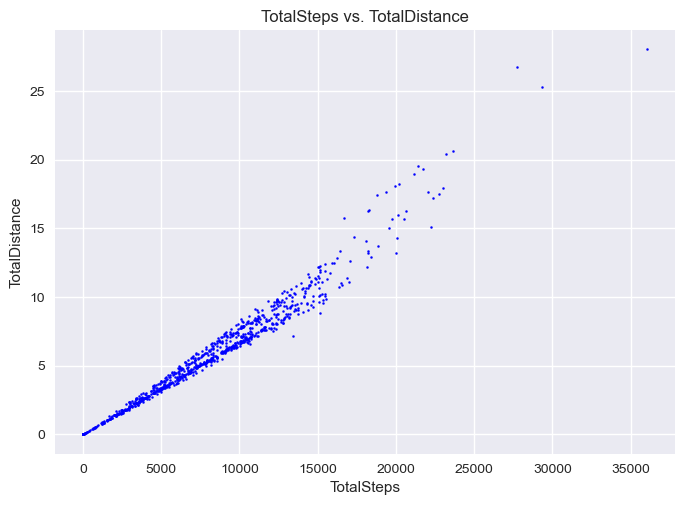

In [452]:
# Relationship between TotalSteps and TotalDistance
plt.scatter(daily_activity['TotalSteps'], daily_activity['TotalDistance'], c ="blue", s=2)
# To show the plot
plt.title("TotalSteps vs. TotalDistance")
plt.xlabel("TotalSteps")
plt.ylabel("TotalDistance")
plt.show()

## Findings
Look at the scatter plot, as we expected total steps is positively correlated to the total distance, since more steps you take, the more distance you travell. However, we can see that as we increase steps, we see more variations in distances travelled. 

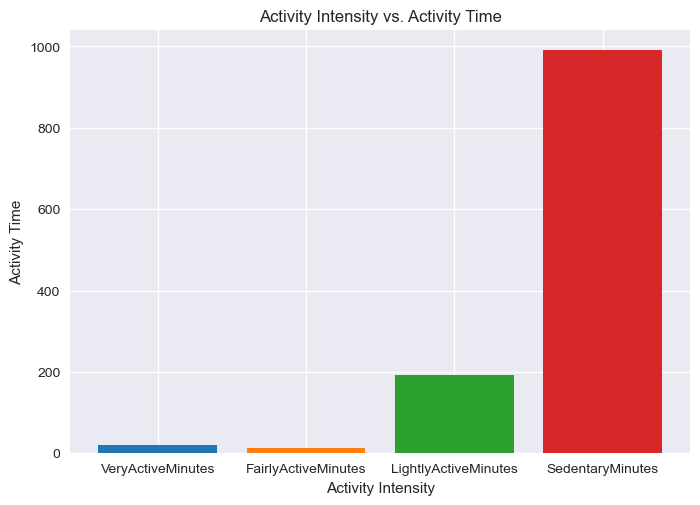

In [512]:
# Distribution of active minutes
minutes_x = list(daily_activity.columns)[10:14]
active_minutes = [daily_activity.describe().VeryActiveMinutes['mean'],
                 daily_activity.describe().FairlyActiveMinutes['mean'],
                 daily_activity.describe().LightlyActiveMinutes['mean'],
                 daily_activity.describe().SedentaryMinutes['mean']]

# Distribution of active distance
distance_x = list(daily_activity.columns)[6:10]
active_distance = [daily_activity.describe().VeryActiveDistance['mean'],
                 daily_activity.describe().ModeratelyActiveDistance['mean'],
                 daily_activity.describe().LightActiveDistance['mean'],
                 daily_activity.describe().SedentaryActiveDistance['mean']]


plt.bar(minutes_x, active_minutes, color = colors)
# To show the plot
plt.title("Activity Intensity vs. Activity Time")
plt.xlabel("Activity Intensity")
plt.ylabel("Activity Time")
plt.show()

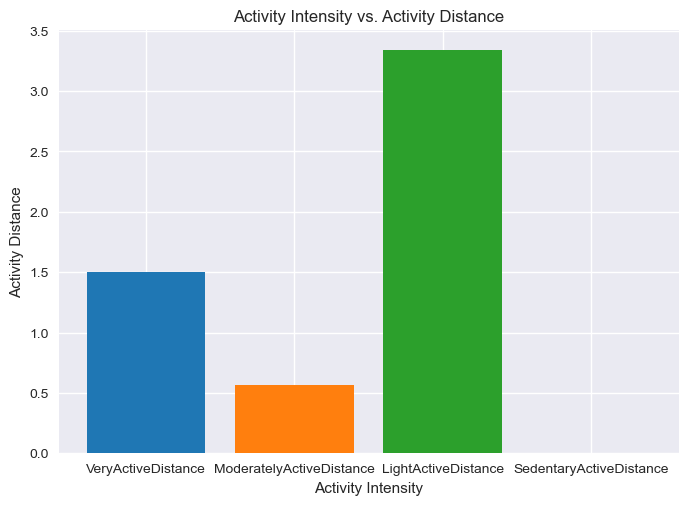

In [513]:
# Distribution of active distance
distance_x = list(daily_activity.columns)[6:10]
active_distance = [daily_activity.describe().VeryActiveDistance['mean'],
                 daily_activity.describe().ModeratelyActiveDistance['mean'],
                 daily_activity.describe().LightActiveDistance['mean'],
                 daily_activity.describe().SedentaryActiveDistance['mean']]

plt.bar(distance_x, active_distance, color = colors)
# To show the plot
plt.title("Activity Intensity vs. Activity Distance")
plt.xlabel("Activity Intensity")
plt.ylabel("Activity Distance")
plt.show()

## Findings
1. Here we see that there is a huge gap between Sedentary and active minutes. It is therefore obvious that most participants spend their time sitting or laying down not moving. This does not necessary mean that they are sleeping since they might be a work sitting in an office. 
2. We also see that most distance travell are light active distances, this might suggest the participants might just be walking or casually strolling most of the time. 

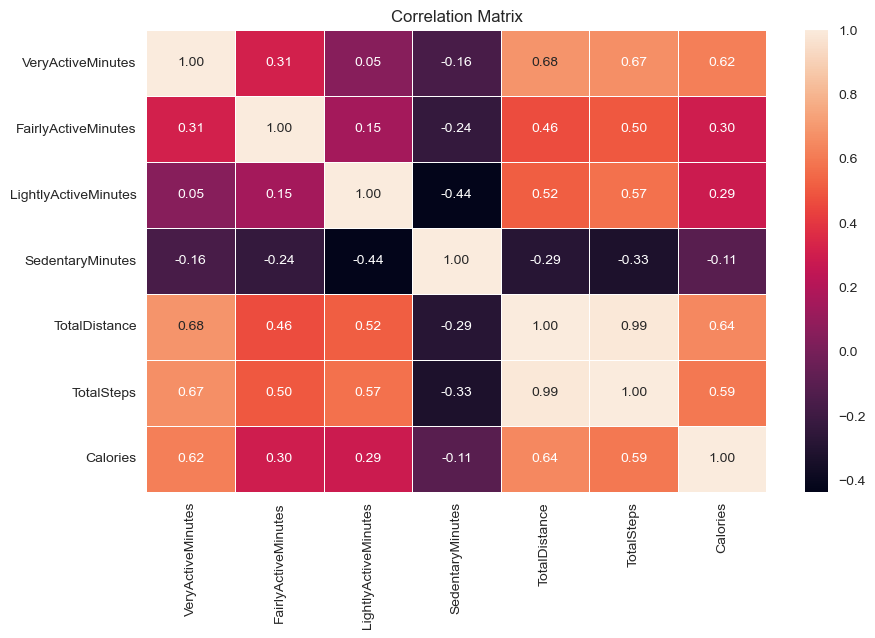

In [333]:


corr_variable = ["VeryActiveMinutes", "FairlyActiveMinutes", 
         "LightlyActiveMinutes", "SedentaryMinutes","TotalDistance", "TotalSteps", "Calories"]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.heatmap(daily_activity[corr_variable].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5)

ax.set_title('Correlation Matrix');


## Findings
1. Here we see that being active is positively correlated to calories burn. The more active you are, the more calories you will burn. 
2. Sedentary is negatively coorelated to calories burn as expected. 
3. More steps taken and distance travell is also positively correlated to calories burn. 

In [562]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,TotalMinutes
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366,1094
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257,1033
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222,1440
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272,998
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266,1440
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309,1440
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253,1440
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313,1440


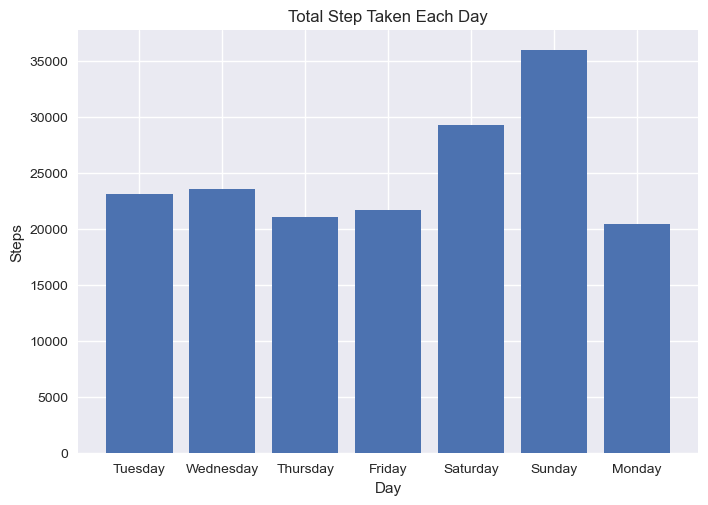

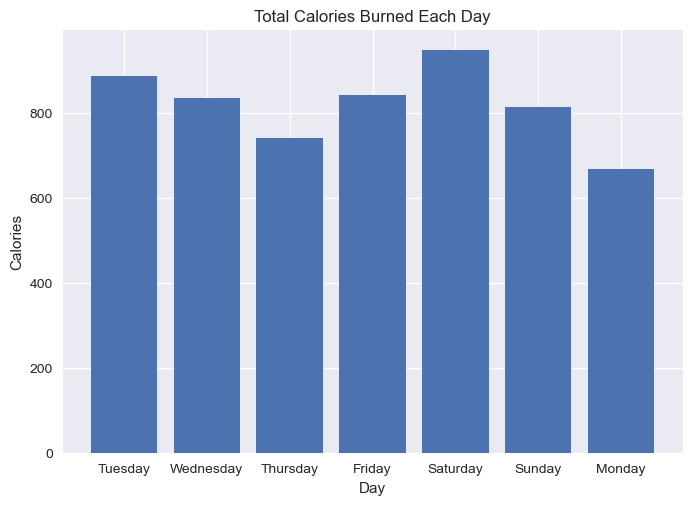

In [578]:
# average_steps_each_day = hourly_calories_steps.groupby(hourly_calories_steps['Day'])['StepTotal'].mean()
# average_steps_each_day.plot(kind='bar', rot=0)
# plt.title("Average Step Taken Each Day")
# plt.xlabel("Day")
# plt.ylabel("Steps")
# plt.show()

# average_calories_each_day = hourly_calories_steps.groupby(hourly_calories_steps['Day'])['Calories'].mean()
# average_calories_each_day.plot(kind='bar', rot=0)
# plt.title("Average Calories Burned Each Day")
# plt.xlabel("Day")
# plt.ylabel("Calories")
# plt.show()
daily_activity

plt.bar(daily_activity['Day'], daily_activity['TotalSteps'])
plt.title("Total Step Taken Each Day")
plt.xlabel("Day")
plt.ylabel("Steps")
plt.show()


plt.bar(hourly_calories_steps['Day'], hourly_calories_steps['Calories'])
plt.title("Total Calories Burned Each Day")
plt.xlabel("Day")
plt.ylabel("Calories")
plt.show()



## Findings
1. Here we can see that most steps are taken on Saturday and Sunday, this might be because the participants needs to go out to excise after a week of work. 
2. The steps taken during weekdays seem quite constant, which suggest that there is not variation to their work stype. Such as office work individuals that does not require much walking. 


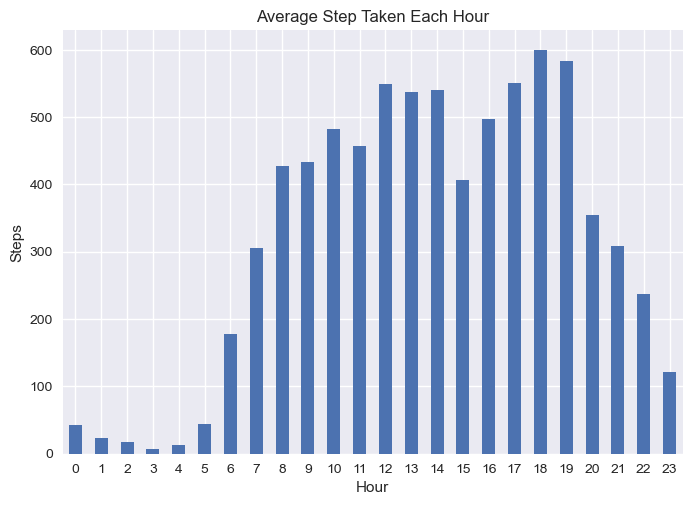

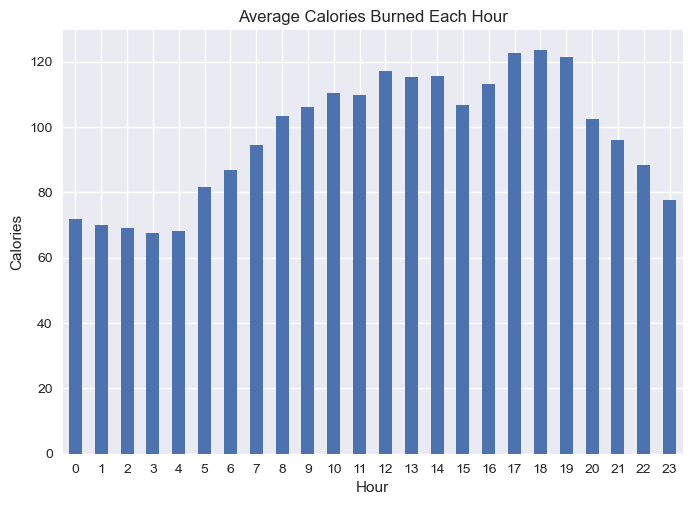

In [548]:
average_steps_each_hour = hourly_calories_steps.groupby(hourly_calories_steps['ActiveHour'])['StepTotal'].mean()
average_steps_each_hour.plot(kind='bar', rot=0)
plt.title("Average Step Taken Each Hour")
plt.xlabel("Hour")
plt.ylabel("Steps")
plt.show()

average_calories_each_hour = hourly_calories_steps.groupby(hourly_calories_steps['ActiveHour'])['Calories'].mean()
average_calories_each_hour.plot(kind='bar', rot=0)
plt.title("Average Calories Burned Each Hour")
plt.xlabel("Hour")
plt.ylabel("Calories")
plt.show()

## Findings
1. We see that people's steps and calories burn starts to go uphill from 5 in the morning all the way to 7 at night. 
2. Theres a break at 3 in the afternoon. 
3. From this we can determind that people have a rest at work at 3 in the afternoon. 
4. After 7 at night, people usually starts to quite down. 
5. There is a huge difference in steps between 5 and 6 in the morning, which could suggest that is usually when the participants get up. 

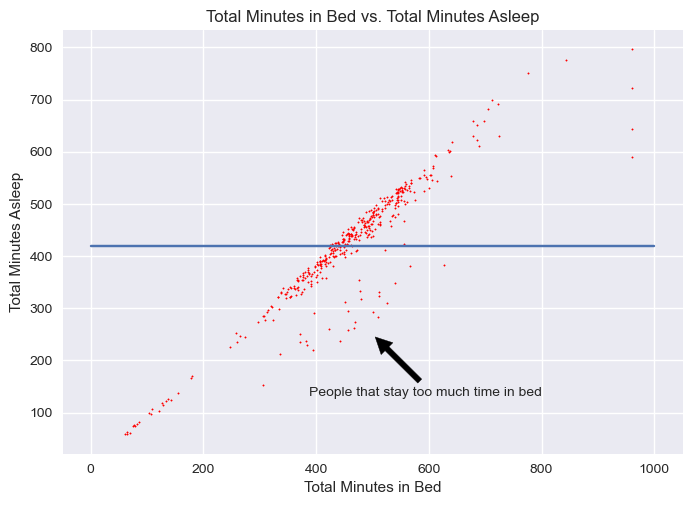

In [549]:
# Sleep Analysis
plt.scatter(sleep['TotalTimeInBed'], sleep['TotalMinutesAsleep'], s=1, c='red')
plt.title("Total Minutes in Bed vs. Total Minutes Asleep")
plt.xlabel("Total Minutes in Bed")
plt.ylabel("Total Minutes Asleep")
plt.annotate('People that stay too much time in bed', xy=(500, 250),  xycoords='data',
            xytext=(800, 150), textcoords='data',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.plot([0,1000], [420,420])
plt.show()

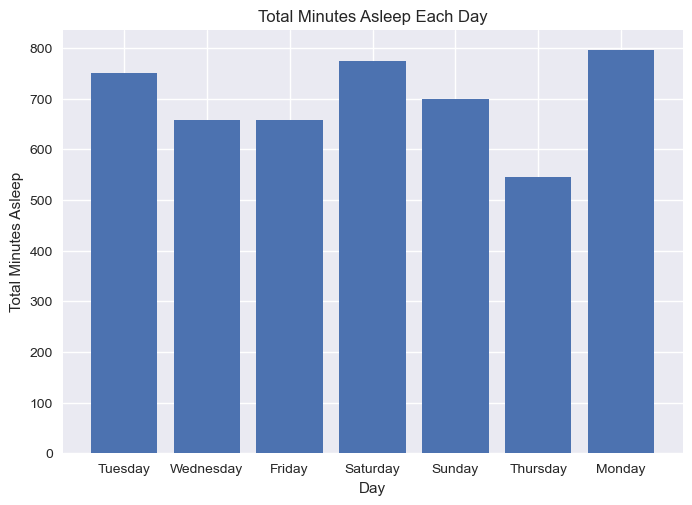

In [580]:
plt.bar(hourly_calories_steps_sleep['Day'], hourly_calories_steps_sleep['TotalMinutesAsleep'])
plt.title("Total Minutes Asleep Each Day")
plt.xlabel("Day")
plt.ylabel("Total Minutes Asleep")
plt.show()

## Findings
1. Here we can see that a lot of people does not have enough sleep, these are the data points below the blue line. 
2. There are few people that sleeps for more than 540mins, which is a sign of oversleep. 
3. We can also observe that there are couple of people that spends too much time in bed but not sleeping. This either shows sign of sleeping problems or they are just playing with their phones in bed. 

# 5. Conclusions
1. Participants needs to be more active then they are right now, they spent too much time not being active or lighty active. 
2. On average people usually burns around 2303 calories a day and walking 5.5km, this seems like the goal for each participants. 
3. Participants starts to get busy at 6 in the morning and settle down after 7 at night. 
4. On average participants does not get enough sleep in a day. 

# 6. Recommendations
1. Bellabeat could send ads and promotions 3 in the afternoon or after 7 at night, since these are the times where the customers are most relaxed. 
2. Bellabeat could let customers know the benifits of excise more. Since it will burn more calories. Not only will this encourage customers to excise more, but also retain more customers. 
3. Bellabeat could setup timers to remind users to be more active or sleeping time since most users don't get enough sleep and excise. 
4. Given that different customers might have different levels of active intensity during the day, Bellabeat could target different customers with different health solutions to better suit their needs. 
5. Bellabeat could encourage customers with things like "You have travelled more than 7600 steps and burned more than 2300 calories today, you just beat half of Bellabeat users !". These kind of message could encourage customers to do more intensive activities. 